## <center> Machine Learning Project<center>

# <center> Diabetes Diagnosis<center>

### <center> Submitted to: Dr. Jagdeep Kaur<center>

#### <center> Submitted by:<center>
####  <center>Nikhil Pujar[20103100] <center>
####  <center>Palla Santosh Kumar[20103104] <center>
####  <center>Prateek Singh[20103109] <center>

### Importing the neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm #support vector machine
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [3]:
dds = pd.read_csv('diabetes.csv')
dds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

### Checking number of records and features

In [5]:
dds.shape

(768, 9)

### Checking if NULL values are present

In [6]:
dds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(dds.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Overview of the dataset

In [8]:
dds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plotting Data Distribution

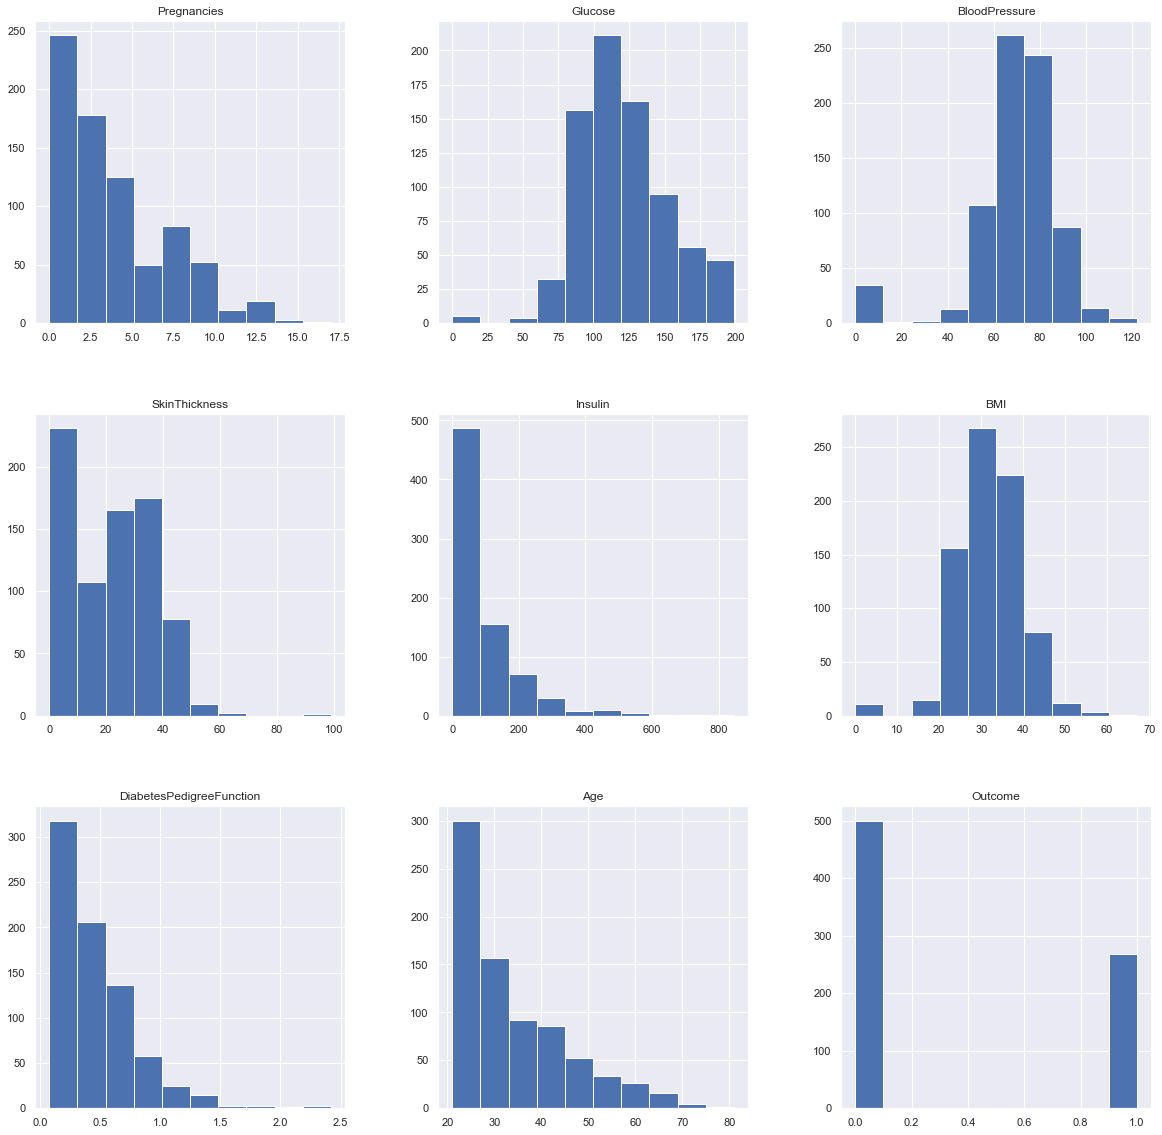

In [9]:
p=dds.hist(figsize = (20,20))

### Looking at distribution of data to identify outliers

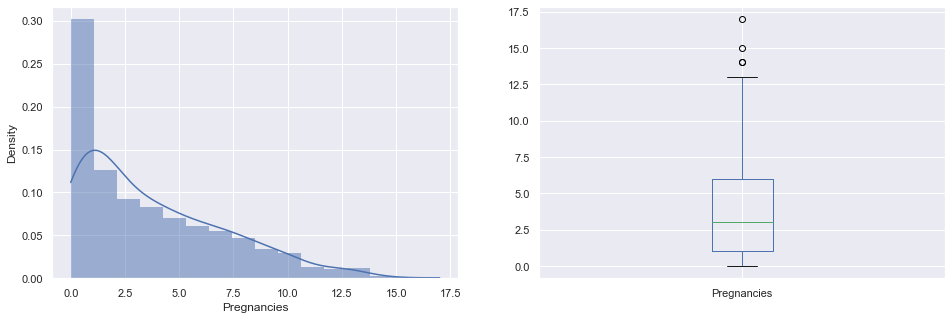

In [10]:
plt.subplot(121),sns.histplot(dds['Pregnancies'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

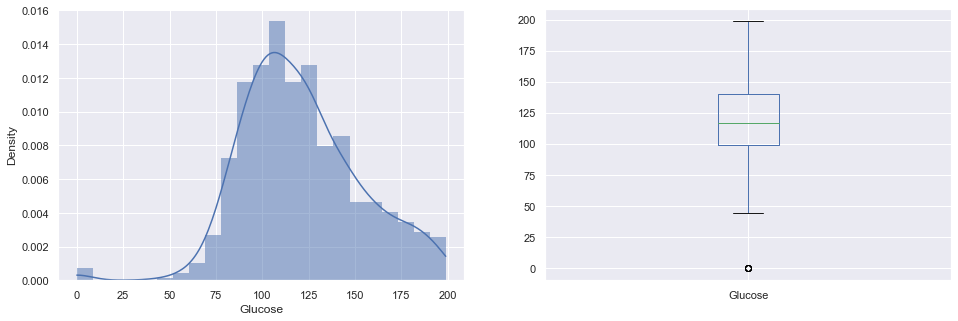

In [11]:
plt.subplot(121),sns.histplot(dds['Glucose'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['Glucose'].plot.box(figsize=(16,5))
plt.show()

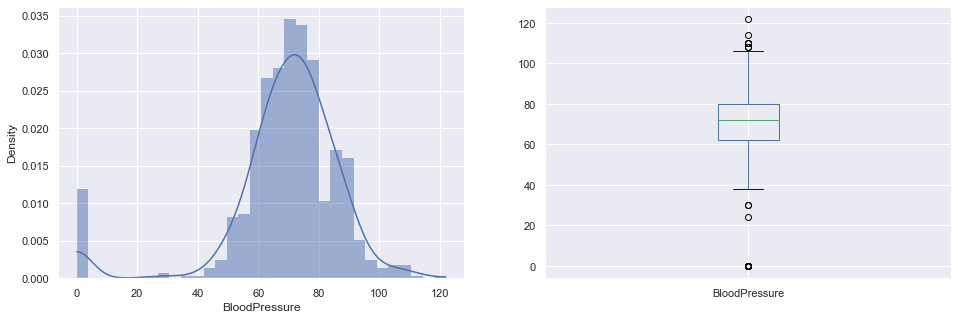

In [12]:
plt.subplot(121),sns.histplot(dds['BloodPressure'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

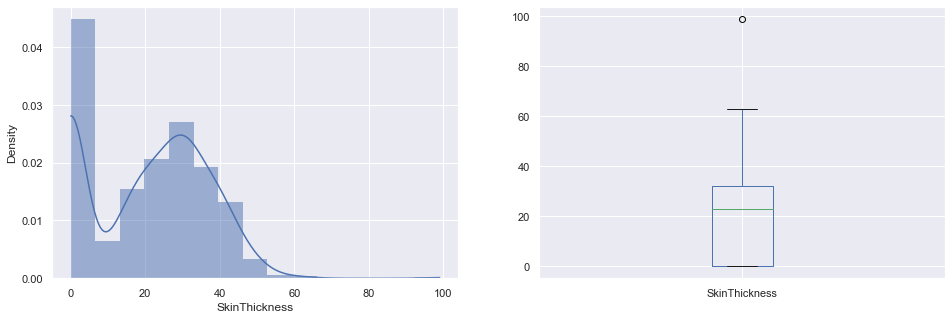

In [13]:
plt.subplot(121),sns.histplot(dds['SkinThickness'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

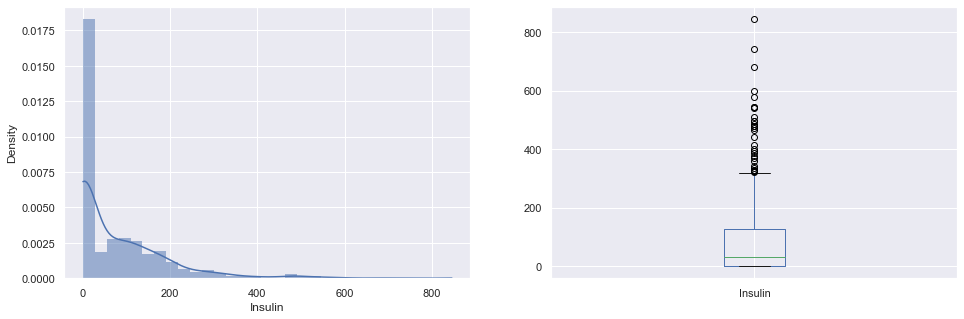

In [14]:
plt.subplot(121),sns.histplot(dds['Insulin'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['Insulin'].plot.box(figsize=(16,5))
plt.show()

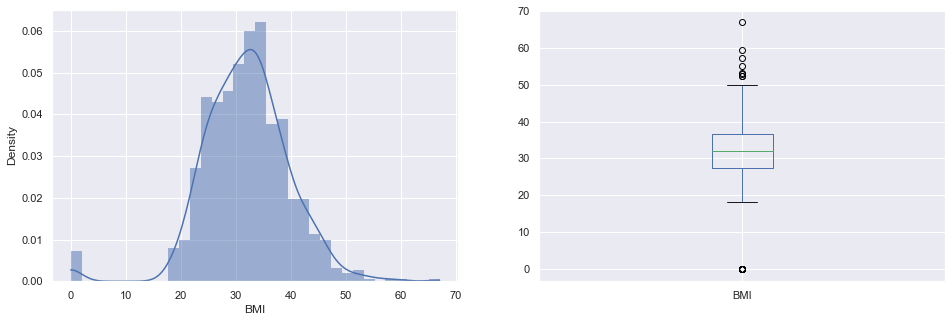

In [15]:
plt.subplot(121),sns.histplot(dds['BMI'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['BMI'].plot.box(figsize=(16,5))
plt.show()

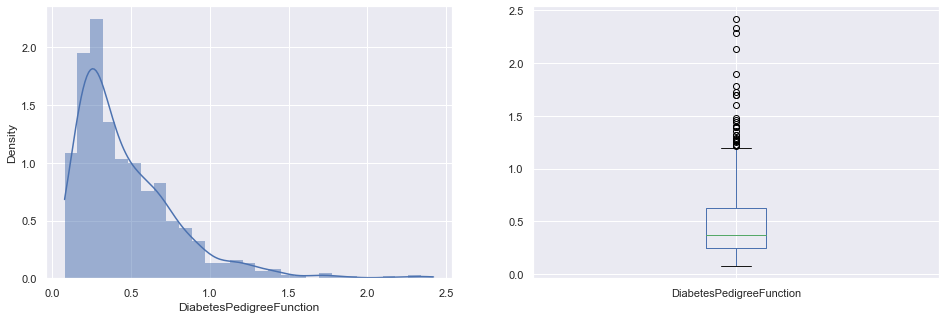

In [16]:
plt.subplot(121),sns.histplot(dds['DiabetesPedigreeFunction'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

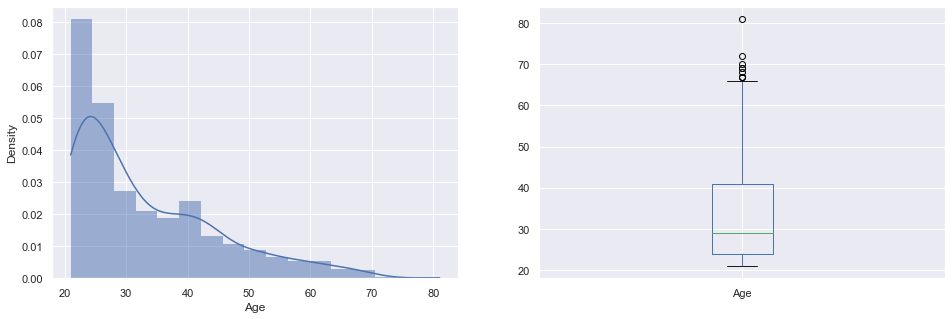

In [17]:
plt.subplot(121),sns.histplot(dds['Age'],kde=True, stat="density", linewidth=0)
plt.subplot(122),dds['Age'].plot.box(figsize=(16,5))
plt.show()

### Dropping Outliers based on Age

In [18]:
print("Old Shape: ", dds.shape)
Q1 = np.percentile(dds['Age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dds['Age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(dds['Age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dds['Age'] <= (Q1-1.5*IQR))

dds.drop(upper[0], inplace = True)
dds.drop(lower[0], inplace = True)
 
print("New Shape: ", dds.shape)

Old Shape:  (768, 9)
New Shape:  (759, 9)


### Dropping Outliers based on Insulin

In [19]:
Q1 = np.percentile(dds['Insulin'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dds['Insulin'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dds.shape)
 
# Upper bound
upper = np.where(dds['Insulin'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dds['Insulin'] <= (Q1-1.5*IQR))

dds.drop(upper[0], inplace = True)
dds.drop(lower[0], inplace = True)
 
print("New Shape: ", dds.shape)

Old Shape:  (759, 9)
New Shape:  (726, 9)


### Co-relation between the features

Text(0.5, 1.0, 'BP vs Glucose')

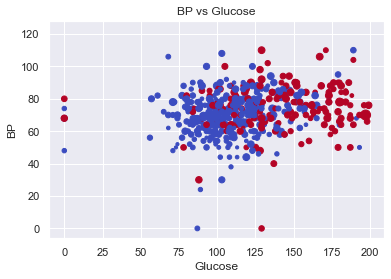

In [20]:
plt.scatter(dds.iloc[:, 1], dds.iloc[:, 2],dds.iloc[:,3], c=dds['Outcome'], cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('BP')
plt.title('BP vs Glucose')

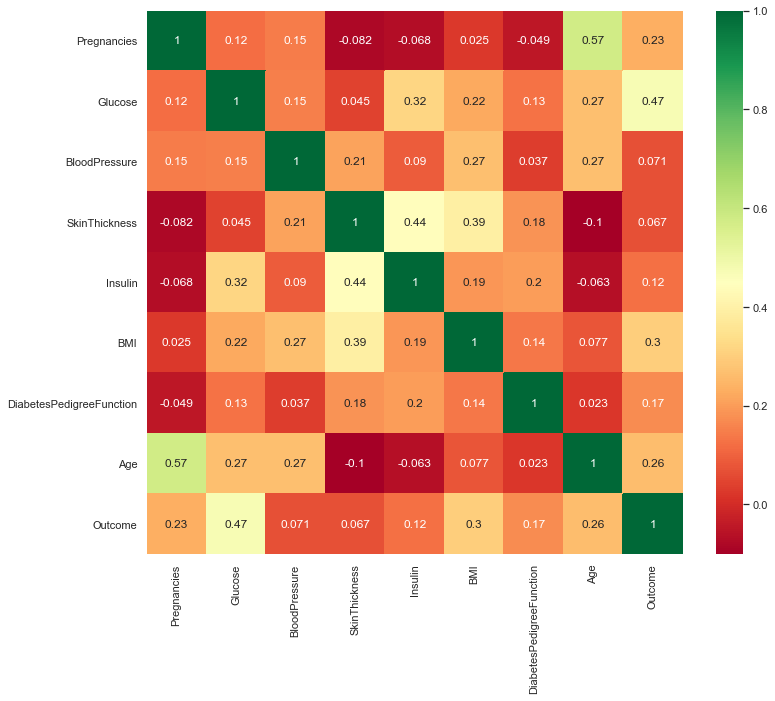

In [21]:
plt.figure(figsize=(12,10))
p=sns.heatmap(dds.corr(), annot=True,cmap ='RdYlGn')

### Observing Distribution of Outcome

In [22]:
dds['Outcome'].value_counts()

0    472
1    254
Name: Outcome, dtype: int64

### Observing Mean Values of Features for Outcomes

In [23]:
dds.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.243644,109.199153,68.122881,19.879237,67.881356,30.420551,0.428731,30.641949
1,4.874016,140.622047,71.011811,22.133858,96.106299,35.297638,0.550299,36.740157


### Splitting & Scaling the Dataset

In [24]:
x=dds.drop('Outcome',axis=1)
y=dds.Outcome

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

scaler = StandardScaler()

xtrain=scaler.fit_transform(xtrain)

xtest=scaler.transform(xtest)

In [25]:
 print(xtrain.shape,xtest.shape,x.shape)

(580, 8) (146, 8) (726, 8)


# <center>Training<center>

### A function to try out different algorithms for  training the model 

In [26]:
def train_test(classifier):
    
    #Training
    classifier.fit(xtrain,ytrain)
    
    #Model evaluation
    #accuracy score
    trainpredict = classifier.predict(xtrain)
    
    trainaccuracy = accuracy_score(trainpredict,ytrain)
    
    #test accuracy
    testp = classifier.predict(xtest)
    
    testa = accuracy_score(testp,ytest)
    
    print('\nAccuracy Score:{}\n------------------------------\n\n'.format(testa))
    
    print('Confusion Matrix:\n')
    cm=confusion_matrix(ytest,testp)
    print(cm)
    
    print('\n\n------------------------------\n\n')
    
    return    

### Making a Predictive System

In [27]:
def predict(classifier):
    Preg = int(input('No. of pregnancies : '))
    Gluc = float(input('Glucoce level : '))
    BP = float(input('Blood Pressure : '))
    ST = float(input('Skin Thickness : '))
    Insulin = float(input('Insulin level : '))
    BMI = float(input('BMI inex value : '))
    DPF = float(input('DiabetesPedigreeFunction : '))
    Age = int(input('Age : '))

    #standardizing our data same like our training data 
    std = scaler.transform([[Preg,Gluc,BP,ST,Insulin,BMI,DPF,Age]])

    #Predict the target concept value
    testp = classifier.predict(std)

    print('\nPrediction: ')

    if testp==0:
        print('Patient is Non-Diabetic')
    else:
        print('Patient is Diabetic')
    return

### SVM (Support Vector Machine)

In [28]:
#SVM Training & Testing
#svm = support vector machine
#SVC = Support Vector Classifier

#Training
classifier_svm = svm.SVC(kernel='linear')
train_test(classifier_svm)

#Testing
predict(classifier_svm)


Accuracy Score:0.7602739726027398
------------------------------


Confusion Matrix:

[[84 11]
 [24 27]]


------------------------------


No. of pregnancies : 1
Glucoce level : 1
Blood Pressure : 1
Skin Thickness : 1
Insulin level : 1
BMI inex value : 1
DiabetesPedigreeFunction : 1
Age : 1

Prediction: 
Patient is Non-Diabetic


### Decision Tree 

In [29]:
#Training
classifier_dtree = DecisionTreeClassifier()
train_test(classifier_dtree)

#Testing
predict(classifier_dtree)


Accuracy Score:0.678082191780822
------------------------------


Confusion Matrix:

[[69 26]
 [21 30]]


------------------------------


No. of pregnancies : 1
Glucoce level : 1
Blood Pressure : 1
Skin Thickness : 1
Insulin level : 1
BMI inex value : 1
DiabetesPedigreeFunction : 1
Age : 1

Prediction: 
Patient is Non-Diabetic


# Random Forest

In [30]:
#Training 
classifier_rf = RandomForestClassifier(n_estimators=200)
train_test(classifier_rf)

#Testing
predict(classifier_rf)


Accuracy Score:0.773972602739726
------------------------------


Confusion Matrix:

[[83 12]
 [21 30]]


------------------------------


No. of pregnancies : 1
Glucoce level : 1
Blood Pressure : 1
Skin Thickness : 1
Insulin level : 1
BMI inex value : 1
DiabetesPedigreeFunction : 1
Age : 1

Prediction: 
Patient is Non-Diabetic


# Naive Bayes

In [31]:
#Training
classifier_nb = GaussianNB()
train_test(classifier_nb)

#Testing
predict(classifier_nb)


Accuracy Score:0.7465753424657534
------------------------------


Confusion Matrix:

[[78 17]
 [20 31]]


------------------------------


No. of pregnancies : 1
Glucoce level : 1
Blood Pressure : 1
Skin Thickness : 1
Insulin level : 1
BMI inex value : 1
DiabetesPedigreeFunction : 1
Age : 1

Prediction: 
Patient is Non-Diabetic


### K-nearest Neighbour

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

train_test(knn)

predict(knn)


Accuracy Score:0.7602739726027398
------------------------------


Confusion Matrix:

[[83 12]
 [23 28]]


------------------------------


No. of pregnancies : 1
Glucoce level : 1
Blood Pressure : 1
Skin Thickness : 1
Insulin level : 1
BMI inex value : 1
DiabetesPedigreeFunction : 1
Age : 1

Prediction: 
Patient is Non-Diabetic


### The best classifier is RandomForest with an accuracy of 77.39% and it should be selected for future predictions.

# 